# **PRACTICAL-2**




##The aim of the practial is to get the hands-on experience of reproducing the machine learning operations at each stage.

1. Import libraries and make a note of the versions of these libraries

In [8]:
import numpy as np
np.__version__

'1.22.4'

In [9]:
import sklearn
sklearn.__version__

'1.2.2'

In [10]:
import matplotlib as plt
plt.__version__

'3.7.1'

In [11]:
import pandas as pd

2. Write a python code to import the Sample.txt data. Further, apply the following processes on the
imported data

In [63]:
data = pd.read_csv("/content/Housing.csv")
print(data)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

a) Scale the dataset. Use the StandardScalar function of scikit learn to normalize the dataset.
Unsure reproduciblity: Store the standard scalar object into your local file system, so that
the same data normalization can be applied to the other data during the deployement.

### Splitting and scaling

In [65]:
x = data['area']
y = data['price']

In [66]:
x.shape,y.shape

((545,), (545,))

In [67]:
x,y

(0      7420
 1      8960
 2      9960
 3      7500
 4      7420
        ... 
 540    3000
 541    2400
 542    3620
 543    2910
 544    3850
 Name: area, Length: 545, dtype: int64,
 0      13300000
 1      12250000
 2      12250000
 3      12215000
 4      11410000
          ...   
 540     1820000
 541     1767150
 542     1750000
 543     1750000
 544     1750000
 Name: price, Length: 545, dtype: int64)

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
randomstate = 42

In [70]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = randomstate)

## Mount

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
drivefolder = "/content/drive/MyDrive/SEM-7/MLOps"
import os

In [74]:
os.path.join(drivefolder,"x_train.npy")

'/content/drive/MyDrive/SEM-7/MLOps/x_train.npy'

In [75]:
np.save(os.path.join(drivefolder,"x_train.npy"),x_train)
np.save(os.path.join(drivefolder,"x_test.npy"),x_test)
np.save(os.path.join(drivefolder,"y_train.npy"),y_train)
np.save(os.path.join(drivefolder,"y_test.npy"),y_test)

### Normalization

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
#converting pd series to numpy array
x_train_reshape = np.asarray(x_train).reshape(-1,1)
x_test_reshape = np.asarray(x_test).reshape(-1,1)

In [78]:
scaler = StandardScaler()
scaler.fit(x_train_reshape)
x_train_normalized = scaler.transform(x_train_reshape)
x_test_normalized = scaler.transform(x_test_reshape)

1. Open a new python file
2. Load the 'scaler.pkl'
3. Take 'x_test.npy' as input
4. Apply the 'scaler.transform' and comapre 'x_test_normalized' of new file with this file

In [79]:
#store the scaler object
import pickle
with open(os.path.join(drivefolder,"scaler.pkl"),'wb') as f:
  pickle.dump(scaler,f)

##Save the model

In [ ]:
x_train_normalized = scaler.transform(x_train_reshape)
x_train_normalized

In [ ]:
x_test_normalized = scaler.transform(x_test_reshape)
x_test_normalized

In [82]:
np.save(os.path.join(drivefolder,"x_test_normalized"),x_test_normalized)
np.save(os.path.join(drivefolder,"x_train_normalized"),x_train_normalized)

In [83]:
np.mean(x_train_normalized)

1.2222638803212733e-16

In [84]:
np.mean(x_test_normalized)

-0.008182479453515227

In [85]:
np.std(x_train_normalized)

1.0000000000000002

In [86]:
np.std(x_test_normalized)

0.9210591725069316

#Modelling
##Training

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
reg = LinearRegression()
reg.fit(x_train_normalized, y_train)
Score = reg.score(x_train_normalized, y_train)
CoEfficient = reg.coef_
Intercept = reg.intercept_

##Testing

In [89]:
Predictions = reg.predict(x_test_normalized)

In [90]:
np.save(os.path.join(drivefolder,"Predictions"),Predictions)


## Evaluation and plots

In [91]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [92]:
mae = mean_absolute_error(y_test, Predictions)

#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_test, Predictions) #default=True
rmse = mean_squared_error(y_test, Predictions,squared=False)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 1474748.1337969352
MSE: 3675286604768.1855
RMSE: 1917103.7021424235


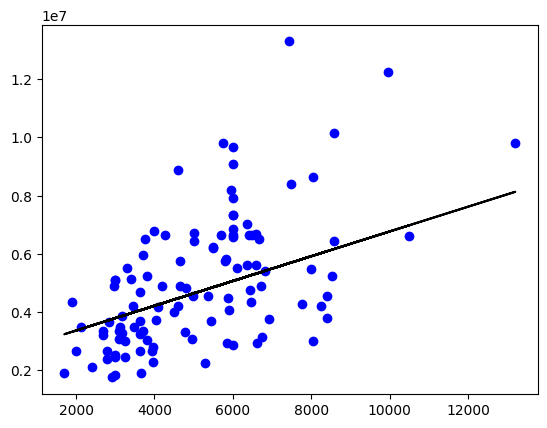

In [93]:
import matplotlib.pyplot as plt
plt.scatter(x_test, y_test, color ='b')
plt.plot(x_test, Predictions, color ='k')
plt.show()